In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.table import Table
from astroduet.models import load_bai
from astroduet.utils import galex_nuv_flux_to_abmag, galex_to_duet
from astroduet.config import Telescope

In [2]:
bai = load_bai()
duet = Telescope()

# Convert to DUET Mags:
[duet1, duet2] = galex_to_duet([bai['SURFFUV'], bai['SURFNUV']])


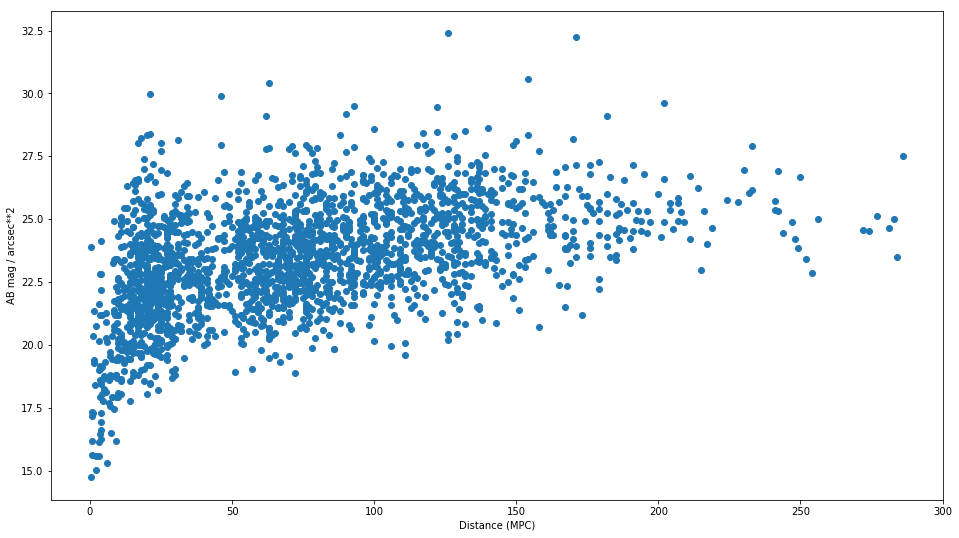

In [3]:
f = plt.figure(figsize=[16, 9])
plt.scatter(bai['DIST'], duet1)
plt.xlabel('Distance (MPC)')
plt.ylabel('AB mag / arcsec**2')
plt.show()

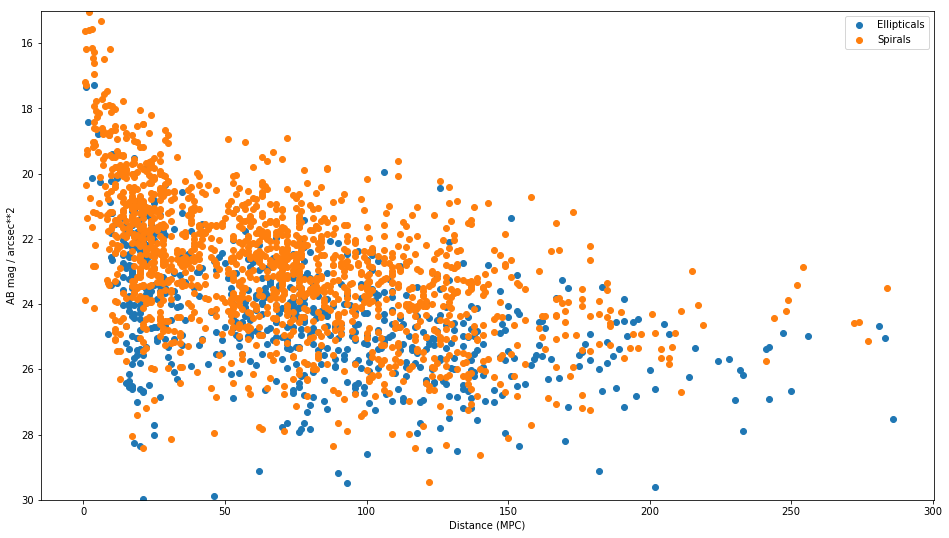

In [4]:
ellpitical = (bai['MORPH'] <= 0)
spirals = (bai['MORPH'] > 0)
f = plt.figure(figsize=[16, 9])
plt.scatter(bai['DIST'][ellpitical], duet1[ellpitical], label = 'Ellipticals')
plt.scatter(bai['DIST'][spirals], duet1[spirals], label = 'Spirals')
plt.legend()
plt.xlabel('Distance (MPC)')
plt.ylabel('AB mag / arcsec**2')
plt.ylim([30, 15])
plt.show()

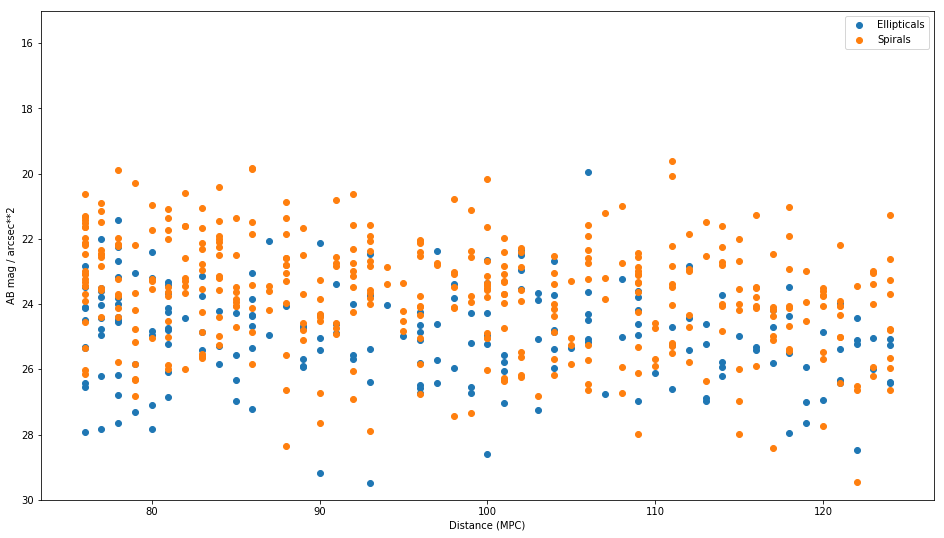

Ellipticals: DUET1 AB mag per arcsec2: 24.954117694324346
Spirals: DUET1 AB mag per arcsec2: 23.684754905932877

Ellipticals: DUET2 AB mag per arcsec2: 24.744494019114867
Spirals: DUET2 AB mag per arcsec2: 23.827616937816682


In [5]:
dist_range = (bai['DIST'] > 75) & (bai['DIST'] < 125)
ellpitical = (bai['MORPH'] <= 0) & dist_range
spirals = (bai['MORPH'] > 0) & dist_range
f = plt.figure(figsize=[16, 9])
plt.scatter(bai['DIST'][ellpitical], duet1[ellpitical], label = 'Ellipticals')
plt.scatter(bai['DIST'][spirals], duet1[spirals], label = 'Spirals')
plt.legend()
plt.xlabel('Distance (MPC)')
plt.ylabel('AB mag / arcsec**2')
plt.ylim([30, 15])


plt.show()
elliptical_mean = duet1[ellpitical].mean()
spirals_mean = duet1[spirals].mean()
print('Ellipticals: DUET1 AB mag per arcsec2: {}'.format(elliptical_mean))
print('Spirals: DUET1 AB mag per arcsec2: {}'.format(spirals_mean))

print()
elliptical_mean = duet2[ellpitical].mean()
spirals_mean = duet2[spirals].mean()
print('Ellipticals: DUET2 AB mag per arcsec2: {}'.format(elliptical_mean))
print('Spirals: DUET2 AB mag per arcsec2: {}'.format(spirals_mean))



